<a href="https://colab.research.google.com/github/K-knot/Astropy/blob/main/preparation/Astorpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 事前準備

Astropyを使用するための事前準備を行います。

In [42]:
# Astropyをインストール
!pip install astropy
# Git Cloneを作成
!git clone https://github.com/K-knot/Astropy.git

fatal: destination path 'Astropy' already exists and is not an empty directory.


Image size: 232 x 400
Image bands: ('R', 'G', 'B')


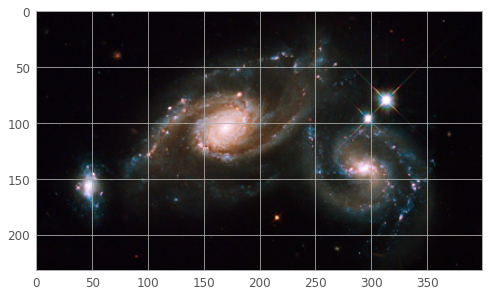

In [43]:
# 画像を表示
import numpy as np
from PIL import Image
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style

plt.style.use(astropy_mpl_style)

image = Image.open('/content/Astropy/preparation/Hs-2009-14-a-web.jpg')
xsize, ysize = image.size
print(f"Image size: {ysize} x {xsize}")
print(f"Image bands: {image.getbands()}")
ax = plt.imshow(image)

In [44]:
r, g, b = image.split()
r_data = np.array(r.getdata()) # data is now an array of length ysize*xsize
g_data = np.array(g.getdata())
b_data = np.array(b.getdata())
print(r_data.shape)

(92800,)


In [45]:
r_data = r_data.reshape(ysize, xsize) # data is now a matrix (ysize, xsize)
g_data = g_data.reshape(ysize, xsize)
b_data = b_data.reshape(ysize, xsize)
print(r_data.shape)

(232, 400)


In [46]:
red = fits.PrimaryHDU(data=r_data)
red.header['LATOBS'] = "32:11:56" # add spurious header info
red.header['LONGOBS'] = "110:56"
red.writeto('red.fits')

green = fits.PrimaryHDU(data=g_data)
green.header['LATOBS'] = "32:11:56"
green.header['LONGOBS'] = "110:56"
green.writeto('green.fits')

blue = fits.PrimaryHDU(data=b_data)
blue.header['LATOBS'] = "32:11:56"
blue.header['LONGOBS'] = "110:56"
blue.writeto('blue.fits')

from pprint import pprint
pprint(red.header)

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  400                                                  
NAXIS2  =                  232                                                  
EXTEND  =                    T                                                  
LATOBS  = '32:11:56'                                                            
LONGOBS = '110:56  '                                                            


In [47]:
import astropy.io.fits as iofits
import matplotlib.cm as cm

red_fits_data = iofits.open("red.fits")[0].data
green_fits_data = iofits.open("green.fits")[0].data
blue_fits_data = iofits.open("blue.fits")[0].data

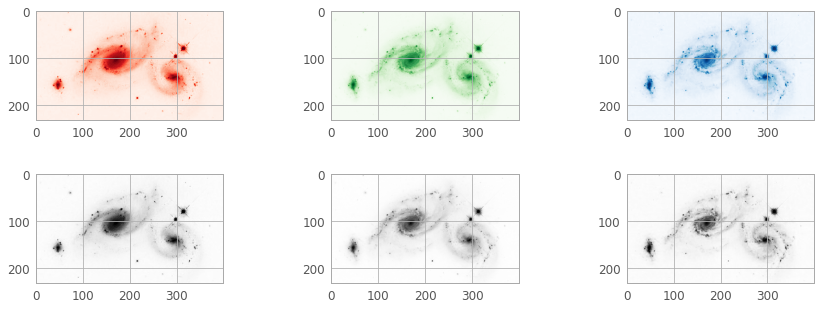

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
axes[0,0].imshow(red_fits_data, cmap='Reds')
axes[0,1].imshow(green_fits_data, cmap='Greens')
axes[0,2].imshow(blue_fits_data, cmap='Blues')
axes[1,0].imshow(red_fits_data, cmap='Greys')
axes[1,1].imshow(green_fits_data, cmap='Greys')
axes[1,2].imshow(blue_fits_data, cmap='Greys')
plt.show()